In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [3]:
df = pd.read_csv("Customers.csv", parse_dates=["BirthDate"], dayfirst= True)
df.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,1966-08-04,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,1965-05-14,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,1965-12-08,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,1968-02-15,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,1968-08-08,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18018 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   Unnamed: 4      18148 non-null  object        
 5   Unnamed: 5      18148 non-null  object        
 6   Unnamed: 6      46 non-null     object        
 7   BirthDate       18148 non-null  datetime64[ns]
 8   Unnamed: 8      0 non-null      float64       
 9   MaritalStatus   18148 non-null  object        
 10  Gender          18018 non-null  object        
 11  EmailAddress    18148 non-null  object        
 12  AnnualIncome    18148 non-null  object        
 13  TotalChildren   18148 non-null  int64         
 14  EducationLevel  18148 non-null  object        
 15  Oc

In [5]:
# Drop columns with 100% null values and other insignificant columns
df = df.drop(columns = ["Unnamed: 8", "Unnamed: 17", "Unnamed: 18", "BirthDate.1", "Unnamed: 5", "Unnamed: 6"])

In [6]:
# Rename some columns 
df.rename(columns = {"Unnamed: 4": "FullName"}, inplace = True)

In [7]:
df.head()

,CustomerKey,Prefix,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,MR. JON YANG,1966-08-04,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-12-08,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18018 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   FullName        18148 non-null  object        
 5   BirthDate       18148 non-null  datetime64[ns]
 6   MaritalStatus   18148 non-null  object        
 7   Gender          18018 non-null  object        
 8   EmailAddress    18148 non-null  object        
 9   AnnualIncome    18148 non-null  object        
 10  TotalChildren   18148 non-null  int64         
 11  EducationLevel  18148 non-null  object        
 12  Occupation      18148 non-null  object        
 13  HomeOwner       18148 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usag

__Observation__: Only `Gender` and `Prefix` have missing values.

In [9]:
(df.isnull().sum()/df.count()[0])

CustomerKey       0.000000
Prefix            0.007163
FirstName         0.000000
LastName          0.000000
FullName          0.000000
BirthDate         0.000000
MaritalStatus     0.000000
Gender            0.007163
EmailAddress      0.000000
AnnualIncome      0.000000
TotalChildren     0.000000
EducationLevel    0.000000
Occupation        0.000000
HomeOwner         0.000000
dtype: float64

In [10]:
# Replace `Gender` and `Prefix` with the most frequent entry per column size the missing values make up for <1%

df["Gender"] = df["Gender"].fillna(df["Gender"].value_counts().index[0])
df["Prefix"] = df["Prefix"].fillna(df["Prefix"].value_counts().index[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18148 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   FullName        18148 non-null  object        
 5   BirthDate       18148 non-null  datetime64[ns]
 6   MaritalStatus   18148 non-null  object        
 7   Gender          18148 non-null  object        
 8   EmailAddress    18148 non-null  object        
 9   AnnualIncome    18148 non-null  object        
 10  TotalChildren   18148 non-null  int64         
 11  EducationLevel  18148 non-null  object        
 12  Occupation      18148 non-null  object        
 13  HomeOwner       18148 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usag

In [12]:
# Convert `TotalChildren` and `AnnualIncome` to integers

df.TotalChildren = df.TotalChildren.astype("int")

df.AnnualIncome = df.AnnualIncome.apply(lambda x : re.sub(r"[$,]", "", x))
df.AnnualIncome = df.AnnualIncome.astype("int")

In [13]:
# Generate `age` column
today = pd.Timestamp("today")

df["Age"] = ((today - df["BirthDate"])/pd.Timedelta(days=365.25)).round().astype("int")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18148 non-null  int64         
 1   Prefix          18148 non-null  object        
 2   FirstName       18148 non-null  object        
 3   LastName        18148 non-null  object        
 4   FullName        18148 non-null  object        
 5   BirthDate       18148 non-null  datetime64[ns]
 6   MaritalStatus   18148 non-null  object        
 7   Gender          18148 non-null  object        
 8   EmailAddress    18148 non-null  object        
 9   AnnualIncome    18148 non-null  int32         
 10  TotalChildren   18148 non-null  int32         
 11  EducationLevel  18148 non-null  object        
 12  Occupation      18148 non-null  object        
 13  HomeOwner       18148 non-null  object        
 14  Age             18148 non-null  int32         
dtypes:

In [17]:
df.drop("CustomerKey", axis = 1, inplace = True)


KeyboardInterrupt



In [18]:
df.head()

,Prefix,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age
0,MR.,JON,YANG,MR. JON YANG,1966-08-04,M,M,jon24@learnsector.com,90000,2,Bachelors,Professional,Y,58
1,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,60000,3,Bachelors,Professional,N,59
2,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-12-08,M,M,ruben35@learnsector.com,60000,3,Bachelors,Professional,Y,58
3,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,70000,0,Bachelors,Professional,N,56
4,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Y,56


## Since this is a classification problem, we will be using the following models
1. LogisticRegression
2. RandomForestClassifier

In [42]:
COLUMNS = ["MaritalStatus", "Gender", "AnnualIncome", "TotalChildren", "EducationLevel", "Occupation", "Age","HomeOwner"]

In [43]:
df_use = df[COLUMNS]
print(df_use.shape)
df_use.head()

(18148, 8)


,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,Age,HomeOwner
0,M,M,90000,2,Bachelors,Professional,58,Y
1,S,M,60000,3,Bachelors,Professional,59,N
2,M,M,60000,3,Bachelors,Professional,58,Y
3,S,F,70000,0,Bachelors,Professional,56,N
4,S,F,80000,5,Bachelors,Professional,56,Y


In [86]:
pd.get_dummies(df_use.drop("HomeOwner", axis = 1))

,AnnualIncome,TotalChildren,Age,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M,EducationLevel_Bachelors,EducationLevel_Graduate Degree,EducationLevel_High School,EducationLevel_Partial College,EducationLevel_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual
0,90000,2,58,1,0,0,1,1,0,0,0,0,0,0,0,1,0
1,60000,3,59,0,1,0,1,1,0,0,0,0,0,0,0,1,0
2,60000,3,58,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,70000,0,56,0,1,1,0,1,0,0,0,0,0,0,0,1,0
4,80000,5,56,0,1,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,30000,1,66,1,0,0,1,0,1,0,0,0,1,0,0,0,0
18144,30000,3,63,0,1,1,0,0,1,0,0,0,1,0,0,0,0
18145,30000,3,64,0,1,0,1,0,1,0,0,0,1,0,0,0,0
18146,30000,3,65,1,0,0,1,1,0,0,0,0,1,0,0,0,0


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [75]:
X = pd.get_dummies(df_use.drop("HomeOwner", axis = 1))
y = df_use["HomeOwner"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## No Sampling

In [63]:
models = {
    "lr": LogisticRegression(),
    "knn":KNeighborsClassifier(),
    "rfc": RandomForestClassifier()
}

In [ ]:
results = []
for model in models.values():
    kf = KFold(n_splits= 6, shuffle = True, random_state= 42)
    cv_results = cross_val_score(model, X_train, y_train, cv= kf)
    results.append(cv_results)
results

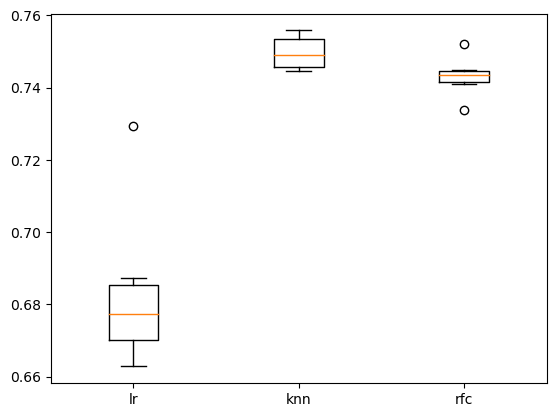

In [67]:
plt.boxplot(results, labels= models.keys());

In [68]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test,y_test)
    print(f"{name}'s score: {test_score}")

lr's score: 0.6738292011019283
knn's score: 0.7363636363636363
rfc's score: 0.7424242424242424


## Over Sampling

In [77]:
over_sampler = RandomOverSampler(random_state= 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [78]:
results = []
for model in models.values():
    kf = KFold(n_splits= 6, shuffle = True, random_state= 42)
    cv_results = cross_val_score(model, X_train_over, y_train_over, cv= kf)
    results.append(cv_results)
results

[array([0.49724939, 0.51100244, 0.49831856, 0.4955671 , 0.49648426,
        0.61204525]),
 array([0.74908313, 0.73410758, 0.73127484, 0.74747784, 0.7395292 ,
        0.74380923]),
 array([0.7707824 , 0.76253056, 0.76031795, 0.7722409 , 0.76734943,
        0.77529807])]

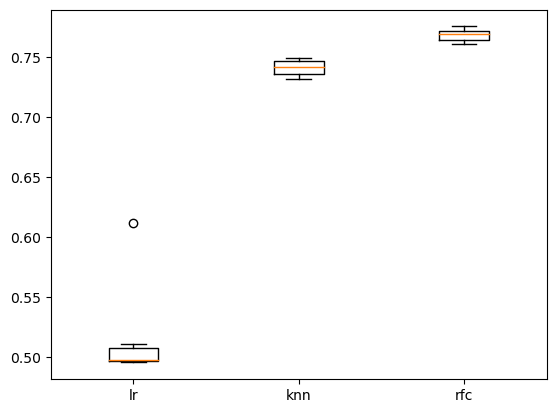

In [79]:
plt.boxplot(results, labels= models.keys());

In [80]:
for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    test_score = model.score(X_test,y_test)
    print(f"{name}'s score: {test_score}")

lr's score: 0.5975206611570248
knn's score: 0.7038567493112947
rfc's score: 0.7121212121212122


---

In [60]:
steps = [
    ("lr", LogisticRegression())
]
pipeline = Pipeline(steps)

In [61]:
lr = LogisticRegression()
pipeline.fit(X_train, y_train)
print(f"Logistic Regression __train__ score: {pipeline.score(X_train, y_train)}")
print(f"Logistic Regression __test__ score: {pipeline.score(X_test, y_test)}")

Logistic Regression __train__ score: 0.6759884281581485
Logistic Regression __test__ score: 0.6738292011019283


In [58]:
rf = RandomForestClassifier(max_depth=42, random_state= 42, n_jobs=-1)
rf.fit(X_train, y_train)
print(f"Logistic Regression __train__ score: {rf.score(X_train, y_train)}")
print(f"Logistic Regression __test__ score: {rf.score(X_test, y_test)}")

Logistic Regression __train__ score: 0.8385452541672407
Logistic Regression __test__ score: 0.7449035812672177


# Second trial

In [91]:
df2 = df_use.copy()

In [92]:
df2.head()

,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,Age,HomeOwner
0,M,M,90000,2,Bachelors,Professional,58,Y
1,S,M,60000,3,Bachelors,Professional,59,N
2,M,M,60000,3,Bachelors,Professional,58,Y
3,S,F,70000,0,Bachelors,Professional,56,N
4,S,F,80000,5,Bachelors,Professional,56,Y


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MaritalStatus   18148 non-null  object
 1   Gender          18148 non-null  object
 2   AnnualIncome    18148 non-null  int32 
 3   TotalChildren   18148 non-null  int32 
 4   EducationLevel  18148 non-null  object
 5   Occupation      18148 non-null  object
 6   Age             18148 non-null  int32 
 7   HomeOwner       18148 non-null  object
dtypes: int32(3), object(5)
memory usage: 921.7+ KB


In [95]:
df2.EducationLevel.unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [96]:
df2.Occupation.unique()

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

In [97]:
df2.groupby("Occupation")["AnnualIncome"].mean().sort_values()

Occupation
Manual            16472.588185
Clerical          30696.047569
Skilled Manual    51732.948234
Professional      74166.666667
Management        92218.532049
Name: AnnualIncome, dtype: float64

In [98]:
df2.Occupation = df2.Occupation.map({
    "Manual":0,
    "Clerical": 1,
    "Skilled Manual": 2,
    "Professional": 3,
    "Management": 4
}).astype('int')

In [99]:
df2.EducationLevel = df2.EducationLevel.map({
    "Partial High School":0,
    "High School": 1,
    "Partial College": 2,
    "Bachelors": 3,
    "Graduate Degree": 4
}).astype("int")

In [100]:
df2

,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,Age,HomeOwner
0,M,M,90000,2,3,3,58,Y
1,S,M,60000,3,3,3,59,N
2,M,M,60000,3,3,3,58,Y
3,S,F,70000,0,3,3,56,N
4,S,F,80000,5,3,3,56,Y
...,...,...,...,...,...,...,...,...
18143,M,M,30000,1,4,1,66,Y
18144,S,F,30000,3,4,1,63,Y
18145,S,M,30000,3,4,1,64,N
18146,M,M,30000,3,3,1,65,Y


In [101]:
X = pd.get_dummies(df2.drop("HomeOwner", axis = 1))
y = df2["HomeOwner"]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## No Sampling

In [103]:
results = []
for model in models.values():
    kf = KFold(n_splits= 6, shuffle = True, random_state= 42)
    cv_results = cross_val_score(model, X_train, y_train, cv= kf)
    results.append(cv_results)
results

[array([0.72024793, 0.66280992, 0.72520661, 0.68719008, 0.66845804,
        0.67465895]),
 array([0.74421488, 0.73884298, 0.75661157, 0.75454545, 0.74493592,
        0.74410914]),
 array([0.74338843, 0.74173554, 0.74586777, 0.74338843, 0.74410914,
        0.75072344])]

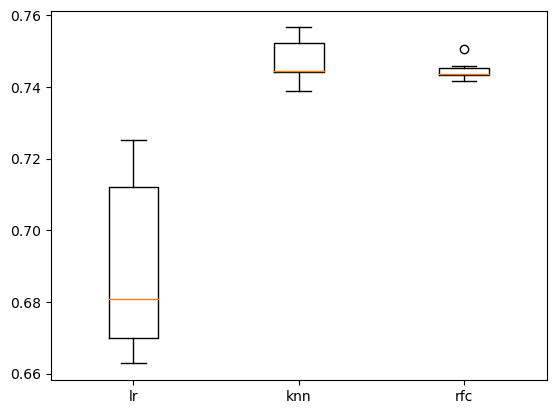

In [104]:
plt.boxplot(results, labels= models.keys());

In [105]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test,y_test)
    print(f"{name}'s score: {test_score}")

lr's score: 0.6738292011019283
knn's score: 0.7418732782369146
rfc's score: 0.7449035812672177


## Over Sampling

In [106]:
over_sampler = RandomOverSampler(random_state= 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [107]:
results = []
for model in models.values():
    kf = KFold(n_splits= 6, shuffle = True, random_state= 42)
    cv_results = cross_val_score(model, X_train_over, y_train_over, cv= kf)
    results.append(cv_results)
results

[array([0.49724939, 0.51100244, 0.49831856, 0.4955671 , 0.49648426,
        0.62335677]),
 array([0.74388753, 0.73685819, 0.72821767, 0.74014063, 0.73005197,
        0.73586059]),
 array([0.77261614, 0.76283619, 0.75787221, 0.77804953, 0.77162947,
        0.77407521])]

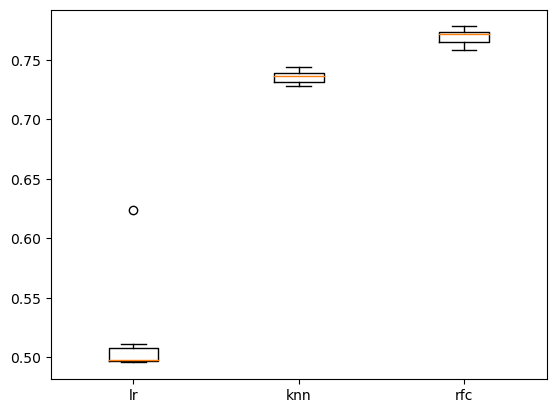

In [108]:
plt.boxplot(results, labels= models.keys());

In [109]:
for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    test_score = model.score(X_test,y_test)
    print(f"{name}'s score: {test_score}")

lr's score: 0.677961432506887
knn's score: 0.7303030303030303
rfc's score: 0.7151515151515152
